iter 0:train_error=0.4713766949943392, valid_error=0.45335009266830717
iter 1:train_error=0.39708292571461434, valid_error=0.3774910128588001
iter 2:train_error=0.34113562875115344, valid_error=0.31932985112589224
iter 3:train_error=0.30083018641547393, valid_error=0.2791763122907113
iter 4:train_error=0.26899284802197687, valid_error=0.2487044456521353
iter 5:train_error=0.2437316871624246, valid_error=0.22402305748179244
iter 6:train_error=0.2272864197567491, valid_error=0.20856336799703376
iter 7:train_error=0.22436448302382997, valid_error=0.20508552916663528
iter 8:train_error=0.2206379860827242, valid_error=0.20136303580936712
iter 9:train_error=0.2195153652701391, valid_error=0.2000805195433836
iter 10:train_error=0.21899921973489553, valid_error=0.19945297446798402
iter 11:train_error=0.21859545258193977, valid_error=0.19894235055807613
iter 12:train_error=0.21827253597677534, valid_error=0.1984439787326216
iter 13:train_error=0.21765209249224035, valid_error=0.1977263686099430

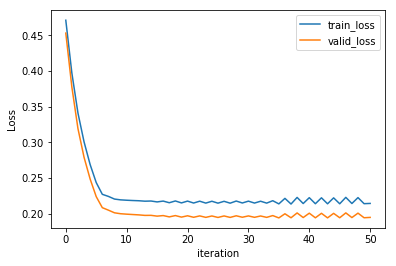

Linear Regression done (^^)/


In [5]:
from sklearn.datasets import load_svmlight_file
from sklearn.cross_validation import train_test_split
from numpy import *
import numpy as np
import matplotlib.pyplot as plt

filename = "australian_scale"
learning_rate = 0.1  #学习率
num_iter = 100  #最大迭代次数
reg=1   #正则化参数

#训练及优化
def optimizer(data1,label1,data2,label2,starting_w):

    w = starting_w
    Loss_train = []
    Loss_valid = []

    for i in range(num_iter):
        w = compute_gradient( w, data1, label1)
        if i<50:
            loss = compute_loss(w, data1, label1)
            loss_valid=compute_loss(w,data2,label2)
            print('iter {0}:train_error={1}, valid_error={2}'.format \
                      (i, float(loss), float(loss_valid)))
            Loss_train.append(float(loss))
            Loss_valid.append(float(loss_valid))

    loss_final = compute_loss(w, data1, label1)
    loss_final2 = compute_loss(w, data2, label2)
    Loss_train.append(loss_final)
    Loss_valid.append(loss_final2)
    return [w,Loss_train,Loss_valid]

def classify(label):
    if label == 1: return 1.0
    else: return 0.0

#梯度更新
def compute_gradient(w_current,data,label):

    N,M = shape(data)
    w_gradient=np.zeros((M, 2))
    for i in range(N):
        v = data[i, :]  #1*M
        score=predict(w_current, v) #1*2
        score=score.A
        score=score.reshape(2,1)
        if label[i]==-1:
            flag=0
        else:
            flag=1
        correct_score=classify(label[i])
        for j in range(2):
            if j==flag:
                continue
            margin = score[j]-correct_score+1
            if margin>0:
                v0=v.T
                v0=v.A
                w_gradient[:,flag]= w_gradient[:,flag]-v0
                w_gradient[:,j]=w_gradient[:,j]+v0
    w_gradient/=N
    w_gradient+=2*reg*w_current
    new_w=w_current-learning_rate*w_gradient
    return new_w

def predict(w,v):

    return v*w  #1*M * M*2 = 1*2

#计算Loss函数值
def compute_loss(w, data, label):

    N, M = shape(data)
    loss=0.0
    for i in range(N):
        if label[i]==-1:
            flag=0
        else:
            flag=1
        v = data[i, :]  #1*M
        score=predict(w, v) #1*2
        score = score.A
        score = score.reshape(2, 1)
        correct_score = classify(label[i])
        for j in range(2):
            if j==flag:
                continue
            margin = score[j]-correct_score+1
            if margin>0:
                loss+=margin
    loss/=N

    return loss

#读入,划分训练和测试数据
def get_data(filename):

    #读入数据
    data = load_svmlight_file(filename)
    X, y = data[0], data[1]
    count=X.shape[0]
    X=X.A
    X=np.column_stack((X, np.ones((count, 1))))
    X=mat(X)
    #划分训练数据和测试数据
    train_X, valid_X, train_y, valid_y = train_test_split(X, y, train_size=0.8, random_state=0)

    return (train_X, valid_X, train_y, valid_y)

def plot_loss(y1,y2):

    plt.plot(y1, label='train_loss')
    plt.plot(y2, label='valid_loss')
    plt.legend()
    plt.xlabel('iteration');
    plt.ylabel('Loss');
    plt.show()

def linear_classification():

    # 参数初始化
    w=mat(np.zeros((15, 2)))
    loss_train = []
    loss_valid = []

    train_X, valid_X, train_y, valid_y = get_data(filename)
    [w, loss_train, loss_valid] = optimizer(train_X, train_y, valid_X, valid_y, w)
    plot_loss(loss_train, loss_valid)

if __name__ =='__main__':

    linear_classification()
    print("Linear Regression done (^^)/")
